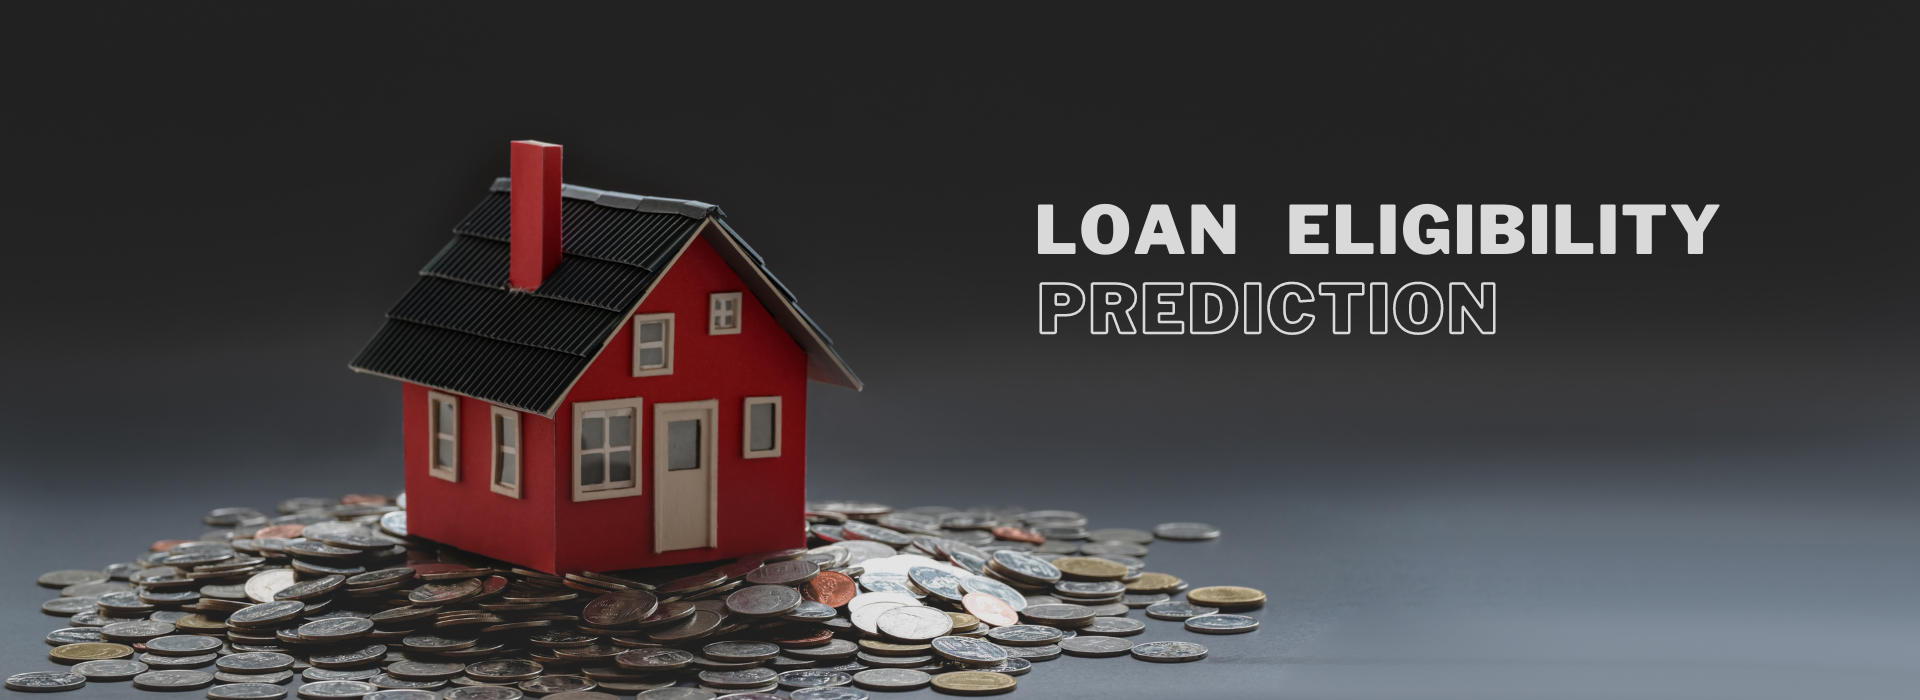

# Introduction

Welcome to our Loan Eligibility Prediction project! In this project, we're going to understand the process of getting loans and who can get them. No complicated words – just little use of machine learning algorithms.

We're looking at different things, like how much money someone makes, the amount they want to borrow, and their credit history. Imagine these factors as building blocks that fit together to decide if someone can get a loan. We're figuring out the right mix of ingredients that makes someone eligible for a loan. No rocket science, just the basics.

By the end of this project, we will know exactly what goes into the decision-making process for loan eligibility.

Let's get started.

# Dataset

**We will use two dataset:**

**Train:**

Train is used to train the model it will have all the label(answers|yes/no) assign to it. Train is going to used to develop the model and test it's accuracy.

**Test:**

The test dataset won't have any predifined label, using the model we have built we will finding the assing class and label for the text dataset.



# Data Understanding

**Attribute information:**

1. **Loan_ID:** A unique identification number assigned to each loan application.

2. **Gender:** The gender of the applicant (e.g., Male).

3. **Married:** Indicates whether the applicant is married (e.g., Yes or No).

4. **Dependents:** The number of dependents the applicant has (e.g., 0, 1).

5. **Education:** The educational qualification of the applicant (e.g., Graduate or Not Graduate).

6. **Self_Employed:** Indicates whether the applicant is self-employed (e.g., Yes or No).

7. **ApplicantIncome:** The income of the applicant.

8. **CoapplicantIncome:** The income of the co-applicant, if any.

9. **LoanAmount:** The amount of the loan applied for.

10. **Loan_Amount_Term:** The term or duration of the loan in months.

11. **Credit_History:** A binary variable indicating whether the applicant has a credit history (e.g., 1 for Yes, 0 for No).

12. **Property_Area:** The area where the property associated with the loan is located (e.g., Urban, Rural).

13. **Loan_Status:** The final status of the loan application (e.g., Y for Yes, N for No).

# Preparation

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-eligible-dataset/loan-train.csv
/kaggle/input/loan-eligible-dataset/loan-test.csv


In [79]:
# Importing all the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# Connecting to the file

df_train = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-train.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [7]:
#Size and info of data

print(f"The size of the data is {df_train.shape}")
print(f"The data have  {df_train.shape[0]} rows and {df_train.shape[1]} columns.")
print()
print(f"The overall information of the data:")
print()
print(df_train.info())

The size of the data is (614, 13)
The data have  614 rows and 13 columns.

The overall information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

In [8]:
# Initial Statistical Analysis
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# How credit history affect the loan status
# for this we will use cross tab

pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

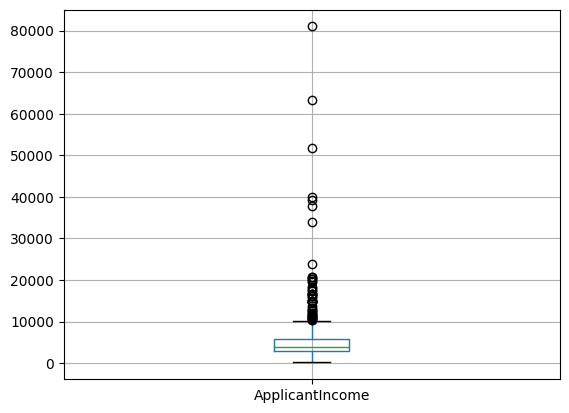

In [11]:
# We have to observe and visualize the applicants income

df_train.boxplot(column = 'ApplicantIncome')

<Axes: ylabel='Frequency'>

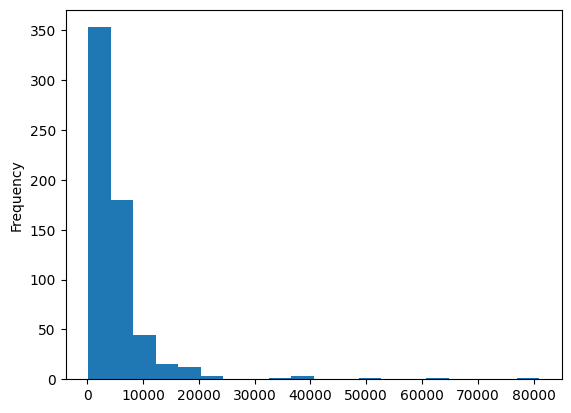

In [12]:
df_train['ApplicantIncome'].plot(kind='hist', bins=20)

<font size = '4'>There are some visual outliers in Applicant Income, we will need to remove them later.</font>

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

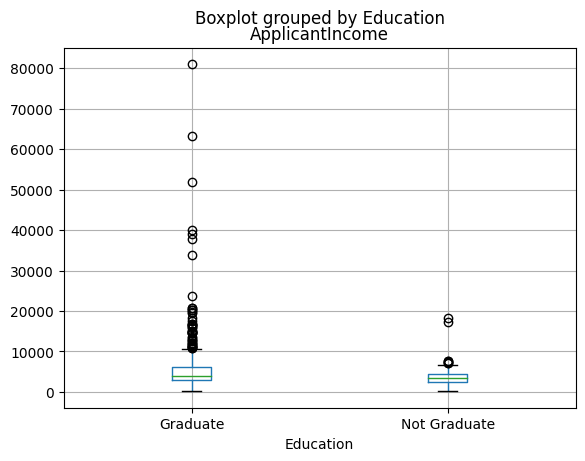

In [13]:
df_train.boxplot(column='ApplicantIncome', by="Education")

<Axes: >

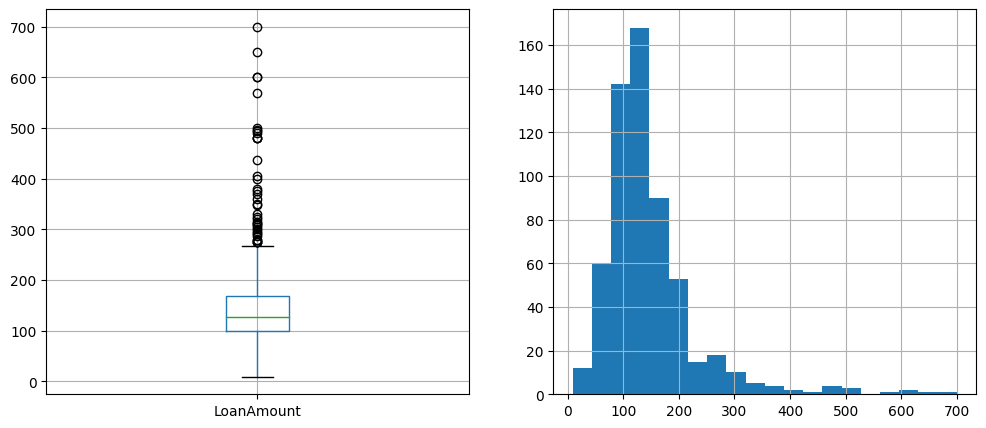

In [14]:
_, ax = plt.subplots(ncols=2,figsize=(12,5))
df_train.boxplot(column='LoanAmount', ax=ax[0])
df_train['LoanAmount'].hist (bins=20,ax=ax[1])

<font size = '4'>Loan Amount is right sweked now let's normalize it!</font>

<Axes: >

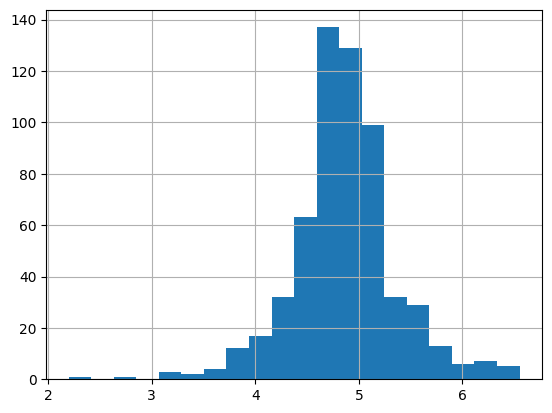

In [15]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)

In [16]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760


In [17]:
# Checking how many null vlaues in the dataset

df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<font size = '4'>There are some null values in train dataset, Let's solve that</font>

In [18]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)

In [19]:
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)

In [20]:
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)

In [21]:
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)

In [22]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

In [23]:
df_train['LoanAmount_log'].fillna(df_train['LoanAmount_log'].mean(), inplace=True)

In [24]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [25]:
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [26]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<font size = '4'>As we seen earlier, in the graphs both Applicant Income and Coapplicant Income are right skwed. Now we should fix that.</font>

<font size = '4'>Instead of normalizing the Applicant Income and Coapplicant Income separately, we can just find the total income which will be the sum of Applicant Income and Coapplicant Income</font>


In [27]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

<Axes: >

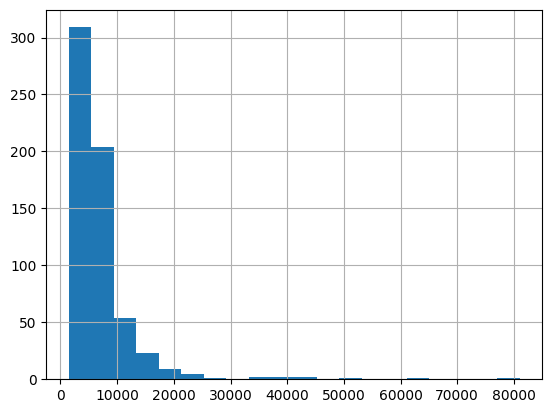

In [28]:
#Visualization of total income without normalizing
df_train['TotalIncome'].hist(bins=20)

<font size = '4'>As we thought it is right skwed</font>

<font size = '4'>Now we have to normalize it by log

In [29]:
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])

<Axes: >

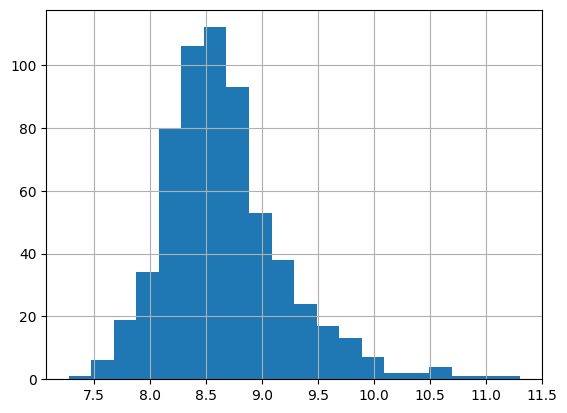

In [30]:
# Now we should visulize if it worked or not

df_train['TotalIncome_log'].hist(bins=20)

<font size = '4'>**Data Preprocessing:**</font>

<font size = '4'>We've divided the dataset into independent variables (x) and the dependent variable (y), which is the 'Loan_Status.'

In [31]:
# x have independent Variable
x = df_train.iloc[:, np.r_[1:5,9:11,13:15]].values

# y have only dependent variable
y = df_train.iloc[:, 12].values

In [32]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [33]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [34]:
# Importing the necessary library for implementation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

<font size = '4'>The data was split into training and testing sets.</font>

In [35]:
x_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

<font size = '4'>And used label encoding to convert categorical variables into numerical values.

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
labelencoder_y = LabelEncoder()

In [37]:
for i in range(0,5):
  x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])
x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])

In [38]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [39]:
y_train = labelencoder_y.fit_transform(y_train)

In [40]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [41]:
for i in range(0,5):
  x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

In [42]:
y_test = labelencoder_y.fit_transform(y_test)

In [43]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [44]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

<font size = '4'>**Data Scaling:**

<font size = '4'>StandardScaler was applied to scale the data. Scaling is essential for certain machine learning algorithms to perform effectively, as it ensures that all features have the same scale.

In [45]:
# Let's scale the data, by scaling the analysis become more easy

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

<font size = '4'>**Decision Tree Classifier:**

<font size = '4'>Applying DecisionTreeClassifier from scikit-learn using the 'entropy' criterion.
    
<font size = '4'>Training the model on the training set (x_train, y_train) and testing it on the testing set (x_test).


In [46]:
# Applying the algorithm decision tree classifier

from sklearn.tree import DecisionTreeClassifier

dtclassifier = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dtclassifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [47]:
# Now we can use this algorithm to predict the value of test dataset
y_pred = dtclassifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [48]:
# Let's find the accuracy

from sklearn import metrics
print("The accuracy of decision tree is: ", metrics.accuracy_score(y_pred, y_test))

The accuracy of decision tree is:  0.7073170731707317


<font size = '4'>The accuracy of the decision tree classifier on the testing set was printed using metrics.accuracy_score.

<font size = '4'>**Naive Bayes Classifier:**

<font size = '4'>Implementing the Gaussian Naive Bayes classifier using GaussianNB.
    
<font size = '4'>Similar to the decision tree, training the Naive Bayes model on the training set and predicting the outcomes on the testing set.

In [49]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()

nbclassifier.fit(x_train,y_train)

GaussianNB()

In [50]:
y_pred = nbclassifier.predict(x_test)

In [51]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [52]:
print("The accuracy of decision tree by naive bayes algorithm is: ", metrics.accuracy_score(y_pred, y_test))

The accuracy of decision tree by naive bayes algorithm is:  0.8292682926829268


<font size = '4'>Now let's import the test dataset, initially it has no label in it and we will use our finding in the test dataset to tell if the person is eligible for loan or not.</font>

In [53]:
df_test = pd.read_csv("/kaggle/input/loan-eligible-dataset/loan-test.csv")

In [54]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
#Size and info of data

print(f"The size of the data is {df_test.shape}")
print(f"The data have  {df_test.shape[0]} rows and {df_test.shape[1]} columns.")
print()
print(f"The overall information of the data:")
print()
print(df_test.info())

The size of the data is (367, 12)
The data have  367 rows and 12 columns.

The overall information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [56]:
# Checking null values if there are any
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<font size = '4'>To remove the null values we will use the same method we used for train data</font>

In [57]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0], inplace= True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0], inplace= True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0], inplace= True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean(), inplace= True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mean(), inplace= True)
df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean(), inplace= True)

In [58]:
df_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

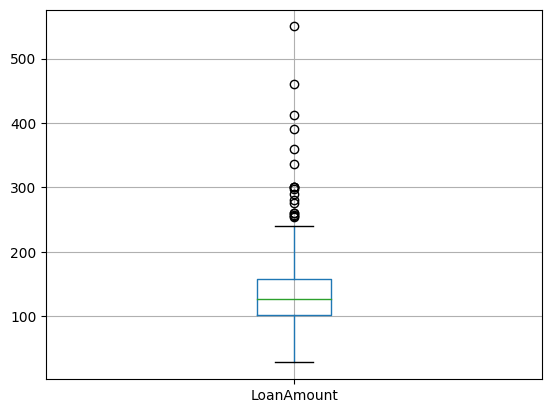

In [59]:
df_test.boxplot(column='LoanAmount')

<Axes: >

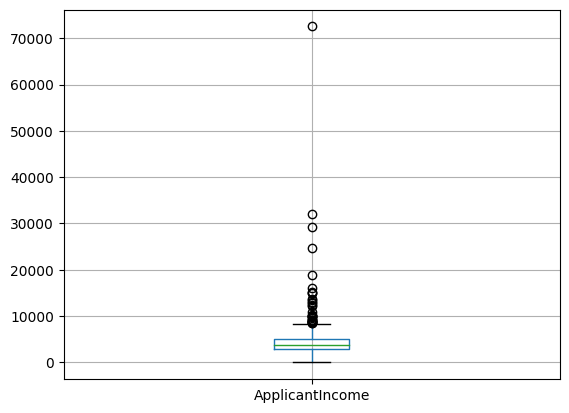

In [60]:
df_test.boxplot(column="ApplicantIncome")

<font size = '4'>We have outliers in both Loan Amount and Applicant Income, we can use log for Loan Amount and Total Income(Applicant Income + Coapplicant Income)

In [61]:
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

In [62]:
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['TotalIncome_log'] = np.log(df_test['TotalIncome'])

In [63]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,4.356709,3276,8.094378


In [64]:
test = df_test.iloc[:, np.r_[1:5,9:11,13:15]].values

In [65]:
for i in range(0,5):
  test[:,i] = labelencoder_x.fit_transform(test[:,i])
test[:,7] = labelencoder_x.fit_transform(test[:,7])

In [66]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 0.8254437869822485, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [67]:
test=ss.fit_transform(test)

In [68]:
prediction = nbclassifier.predict(test)

In [69]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [71]:
# Converting numerical prediction into Y/N format
predicted_labels = ['Y' if pred == 1 else 'N' for pred in prediction]

In [72]:
# Create a new DataFrame with Loan_ID, original features, and Predicted Loan_Status
df_predicted = df_test.copy()
df_predicted['Predicted_Loan_Status'] = predicted_labels

In [89]:
df_predicted['Predicted_Loan_Status_binary'] = prediction

In [92]:
df_predicted.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Predicted_Loan_Status,Predicted_Loan_Status_binary
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,4.700480,5720,8.651724,Y,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,4.836282,4576,8.428581,Y,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,5.337538,6800,8.824678,Y,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,4.605170,4886,8.494129,Y,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,4.356709,3276,8.094378,Y,1


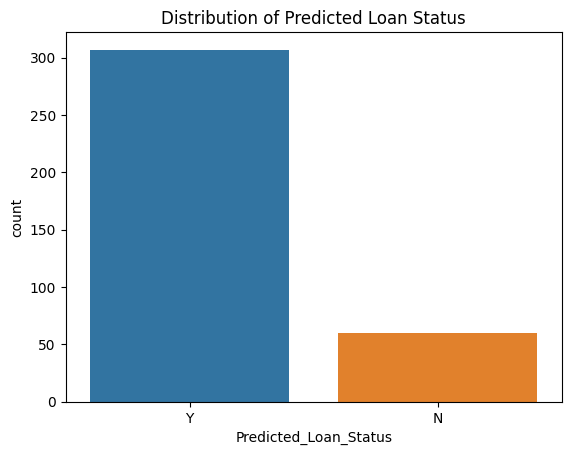

In [81]:
sns.countplot(x='Predicted_Loan_Status', data = df_predicted)
plt.title("Distribution of Predicted Loan Status")
plt.show()

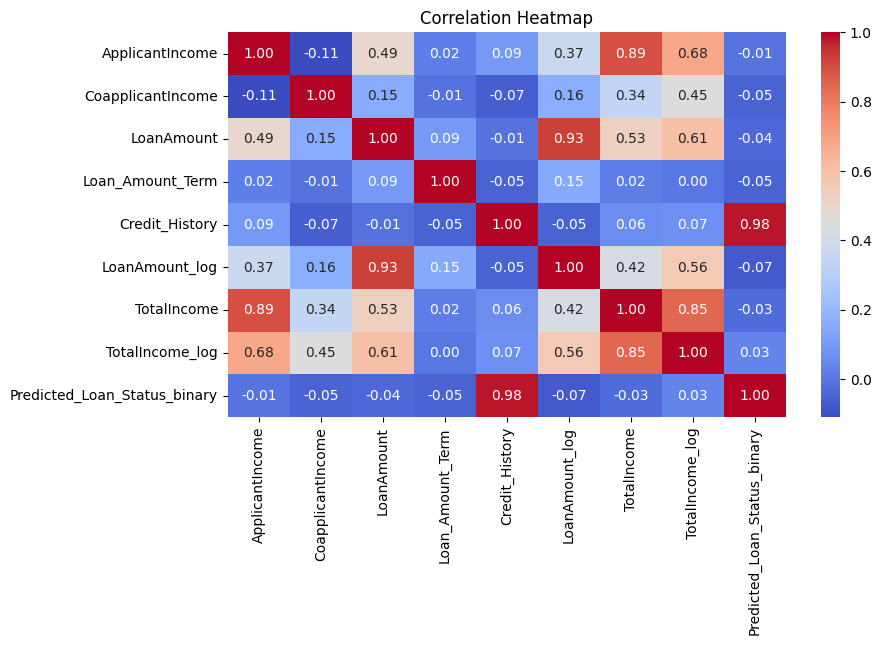

In [95]:
numeric_columns = df_predicted.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(9, 5))
sns.heatmap(df_predicted[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Conclusion

In conclusion, the loan eligibility prediction project aimed to develop a model that could predict whether an individual is eligible for a loan based on various attributes. The analysis involved two datasets – a training set used for model development and testing, and a test set where predictions were made.

# Key Steps in the Project:
**Data Preprocessing:**

* The datasets were carefully preprocessed, including handling missing values and encoding categorical variables.
* Standard scaling was applied to ensure consistency in feature scaling.

**Model Training:**

* Two classification algorithms, Decision Tree and Naive Bayes, were employed to predict loan eligibility.
* In the scope of this data, the Naive Bayes algorithm perform well and provide good accuracy.
* The models were trained using the training dataset, and their performance was evaluated on the testing dataset.

**Prediction on Test Data:**

* The trained Naive Bayes model was applied to the test dataset to predict loan eligibility for each entry.

# Results and Findings:
* The model predictions on the test data resulted in an array ('prediction') where each element represents the model's prediction of loan eligibility.

* Unfortunately, the lack of actual outcomes for the test cases limits our ability to quantitatively assess the model's accuracy on this specific dataset.

* But we can see that the ('Credit_History') is highly correlated to the predicted loan status, and it's value also depend on TotalIncome_log as we can see in heatmap.

* We have large number of people who have been eligible for loan, we can see this in distribution of predicted loan status plot.

# Project Impact:
* While the accuracy on the test dataset remains unknown, the developed models can still be utilized for making predictions and gaining insights into potential loan eligibility.

* The project underscores the importance of having labeled data for model evaluation and highlights the need for ethical considerations in the deployment of machine learning models, especially in critical areas like financial decision-making.

**In summary, the loan eligibility prediction project has laid the groundwork for understanding the application of machine learning in predicting financial outcomes. Future iterations could build upon these foundations to enhance accuracy and applicability.**